In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.utils import resample

In [2]:
data = pd.read_csv('C:\\Users\\fig_g\\Documents\\DS ejercicios\\clientes.csv')
data.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [3]:
data.drop('direccion', axis=1, inplace=True)
data.head()

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589


In [4]:
data['edad']= (data['edad']//10)*10
data

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589
...,...,...,...,...
195,Barbara Jones,40,0,51931
196,Richard Brown,30,1,47712
197,Mary Garcia,60,1,45261
198,James Wilson,40,1,46787


In [5]:
ruido = np.random.normal(0,100, size=data['salario'].shape)
data['salario'] += ruido
data

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61138.040433
1,James Jones,60,1,53941.820662
2,Patricia Wilson,10,0,60121.750487
3,Elizabeth Robinson,20,1,42232.703557
4,Charles Brown,20,1,37596.826093
...,...,...,...,...
195,Barbara Jones,40,0,51877.811603
196,Richard Brown,30,1,47647.068416
197,Mary Garcia,60,1,45308.692400
198,James Wilson,40,1,46763.450660


In [6]:
for i in range(len(data)):
    data.loc[i, 'nombre']= 'cliente' + str(i)
data.head()

,nombre,edad,categoria,salario
0,cliente0,60,0,61138.040433
1,cliente1,60,1,53941.820662
2,cliente2,10,0,60121.750487
3,cliente3,20,1,42232.703557
4,cliente4,20,1,37596.826093


In [7]:
agrupado = data.groupby('categoria')

for nombre, grupo in agrupado:
    print(nombre, grupo)

data_balanceada = pd.DataFrame()

for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo,
                                 replace=True, 
                                n_samples=10,
                               random_state=123)
    data_balanceada = pd.concat([data_balanceada, grupo_balanceado])
data_balanceada

0          nombre  edad  categoria       salario
0      cliente0    60          0  61138.040433
2      cliente2    10          0  60121.750487
7      cliente7    30          0  41461.220294
8      cliente8    30          0  44429.050845
9      cliente9    60          0  50167.927880
..          ...   ...        ...           ...
189  cliente189    40          0  57479.226423
190  cliente190    30          0  58240.211992
194  cliente194    40          0  49925.438303
195  cliente195    40          0  51877.811603
199  cliente199    30          0  36477.606930

[86 rows x 4 columns]
1          nombre  edad  categoria       salario
1      cliente1    60          1  53941.820662
3      cliente3    20          1  42232.703557
4      cliente4    20          1  37596.826093
5      cliente5    50          1  58188.070809
6      cliente6    20          1  40443.019212
..          ...   ...        ...           ...
192  cliente192    20          1  61066.755822
193  cliente193    30          1 

,nombre,edad,categoria,salario
158,cliente158,50,0,41392.059415
42,cliente42,30,0,59420.377068
194,cliente194,40,0,49925.438303
133,cliente133,50,0,42028.504586
114,cliente114,60,0,53735.525270
177,cliente177,40,0,51737.775361
83,cliente83,30,0,46189.453742
113,cliente113,60,0,68544.582541
56,cliente56,40,0,51792.195589
194,cliente194,40,0,49925.438303


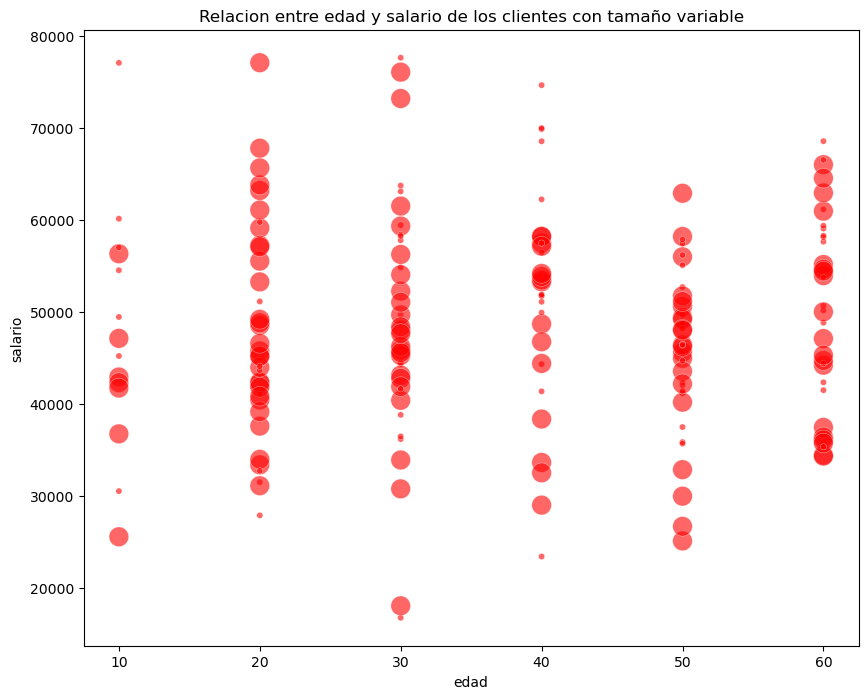

In [8]:
plt.figure(figsize=(10,8))
sizes = data['categoria'].replace({0: 50, 1: 100})
scatter = sns.scatterplot(x='edad',
                         y='salario',
                         size=sizes,
                         legend=False,
                         sizes=(20, 200),
                         data=data,
                         color='red',
                         alpha=0.6)
scatter.set(title='Relacion entre edad y salario de los clientes con tamaño variable',
           xlabel='edad',
           ylabel='salario');

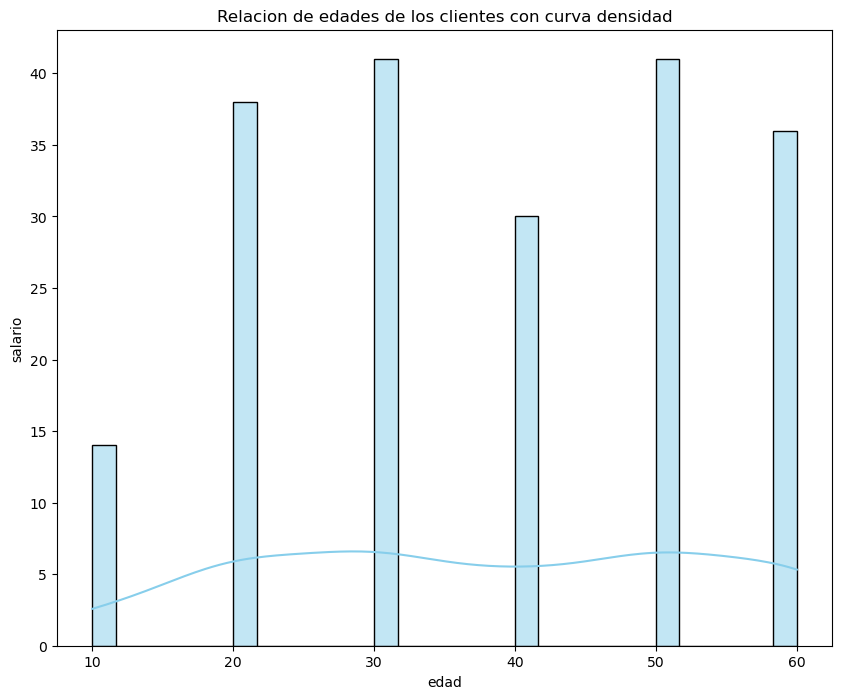

In [9]:
plt.figure(figsize=(10,8))
sizes = data['categoria'].replace({0: 50, 1: 100})
ax = sns.histplot(data['edad'],
                 kde=True,
                 color='skyblue',
                 bins=30)
ax.set(title='Relacion de edades de los clientes con curva densidad',
           xlabel='edad',
           ylabel='salario');